In [ ]:
#Файл взят отсюда, на гитхаб нельзя загрузить, т.к слишком большой
#https://www.kaggle.com/datasets/datasnaek/youtube-new/download?datasetVersionNumber=115
#Была произведена двойная перекодировка: сначала в utf-8, затем в cp1251

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
data = pd.read_csv('RUvideos.csv', usecols=['trending_date', 'title', 'channel_title', 'publish_time', 'views', 'likes', 'dislikes', 'comment_count'], encoding='cp1251', sep=';')
data.head()

,trending_date,title,channel_title,publish_time,views,likes,dislikes,comment_count
0,17.14.11,Захар и Полина учатся экономить,Т—Ж БОГАЧ,13.11.2017 12:09,62408,334,190,50
1,17.14.11,Биржа Мемов #29. Большои? выпуск,Druzhko Show,13.11.2017 20:32,330043,43841,2244,2977
2,17.14.11,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,13.11.2017 19:11,424596,49854,714,2944
3,17.14.11,Сочная кесадилья с курицей,Hochland,13.11.2017 9:51,112851,3566,122,80
4,17.14.11,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,13.11.2017 19:52,243469,36216,631,1692


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40739 entries, 0 to 40738
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   trending_date  40739 non-null  object
 1   title          40739 non-null  object
 2   channel_title  40739 non-null  object
 3   publish_time   40739 non-null  object
 4   views          40739 non-null  int64 
 5   likes          40739 non-null  int64 
 6   dislikes       40739 non-null  int64 
 7   comment_count  40739 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 2.5+ MB


In [4]:
data['trending_date'] = pd.to_datetime(data['trending_date'], format='%y.%d.%m')
data['publish_time'] = pd.to_datetime(data['publish_time'], format='%d.%m.%Y %H:%M')
data['day_of_week_trending_date'] = data['trending_date'].dt.day_name()
data['year_trending_date'] = data['trending_date'].dt.year
data['month_trending_date'] = data['trending_date'].dt.month
data['ratio'] = round(data['likes']/data['views']*100)
data

,trending_date,title,channel_title,publish_time,views,likes,dislikes,comment_count,day_of_week_trending_date,year_trending_date,month_trending_date,ratio
0,2017-11-14,Захар и Полина учатся экономить,Т—Ж БОГАЧ,2017-11-13 12:09:00,62408,334,190,50,Tuesday,2017,11,1.0
1,2017-11-14,Биржа Мемов #29. Большои? выпуск,Druzhko Show,2017-11-13 20:32:00,330043,43841,2244,2977,Tuesday,2017,11,13.0
2,2017-11-14,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,2017-11-13 19:11:00,424596,49854,714,2944,Tuesday,2017,11,12.0
3,2017-11-14,Сочная кесадилья с курицей,Hochland,2017-11-13 09:51:00,112851,3566,122,80,Tuesday,2017,11,3.0
4,2017-11-14,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,2017-11-13 19:52:00,243469,36216,631,1692,Tuesday,2017,11,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...
40734,2018-06-14,У меня СДВГ! (Story booth на русском) Русская ...,Pastime Time,2018-06-13 16:47:00,129488,5893,164,990,Thursday,2018,6,5.0
40735,2018-06-14,Мои Детские Травмы 2 (анимация),CaGArt,2018-06-12 12:38:00,99163,4659,337,692,Thursday,2018,6,5.0
40736,2018-06-14,[ENG SUB] BTS PROM PARTY 2018 Intro + 2nd Gran...,DaisyxBTS 07,2018-06-13 15:51:00,449611,24808,93,974,Thursday,2018,6,6.0
40737,2018-06-14,ОБЗОР ВАННОЙ КОМНАТЫ??/ТУАЛЕТНОЙ КОМНАТЫ?? + Д...,Ксюша Лебедева,2018-06-13 03:23:00,14225,793,39,209,Thursday,2018,6,6.0


<Axes: title={'center': 'Распределение в процентах отношения лайков к просмотрам на видео, попавших в тренд с 2017-11-14 по 2018-06-14 в ру сегменте'}, ylabel='Frequency'>

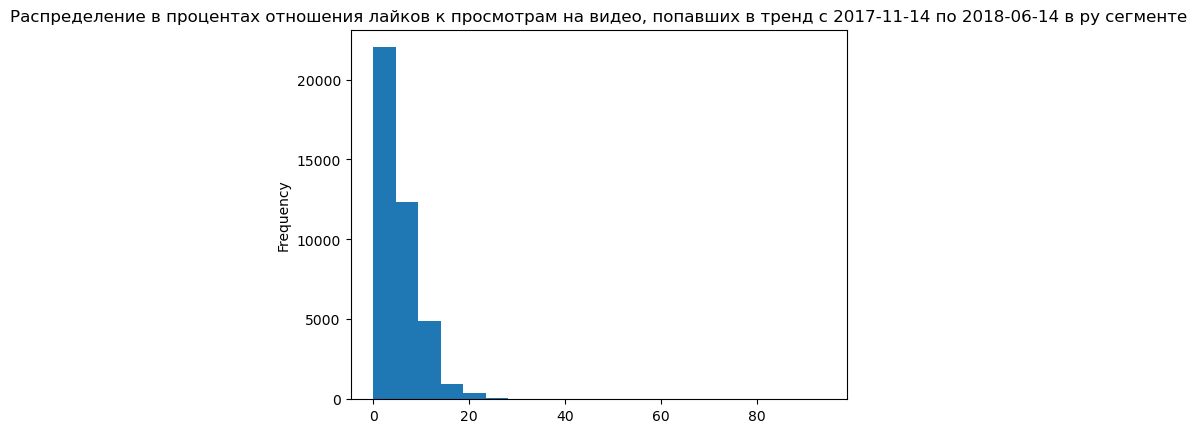

In [5]:
data['ratio'].plot(kind='hist',
                     title='Распределение в процентах отношения лайков к просмотрам на видео, попавших в тренд с 2017-11-14 по 2018-06-14 в ру сегменте', bins=20)
#Видим, что в большинстве случаев это число варьируется в диапазоне до 20%, по такому отношению можно вычислять накрученные лайки к видео и просмотры

In [6]:
dinamics_by_day = data[['title', 'day_of_week_trending_date']].groupby('day_of_week_trending_date').count()
dinamics_by_day

,title
day_of_week_trending_date,
Friday,5785
Monday,5772
Saturday,5947
Sunday,5732
Thursday,5783
Tuesday,5953
Wednesday,5767


<Axes: title={'center': 'Распределение количества трендовых видео по дням в ру сегменте c 2017-11-14 по 2018-06-14'}, xlabel='День недели', ylabel='Количество видео'>

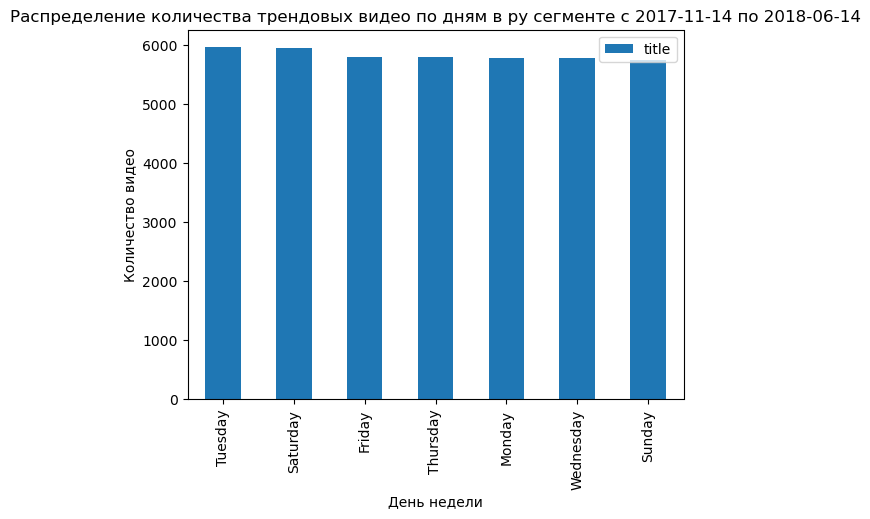

In [7]:
dinamics_by_day.sort_values(by='title', ascending=False).plot(kind='bar', title='Распределение количества трендовых видео по дням в ру сегменте c 2017-11-14 по 2018-06-14', xlabel='День недели', ylabel='Количество видео')
#Видим, что количество видео, попавших в тренд в этот период, примерно одинаково в каждый из дней недели, что говорит о том, что алгоритмы ютуба работают в каждый день одинаково

(0.0, 1000000.0)

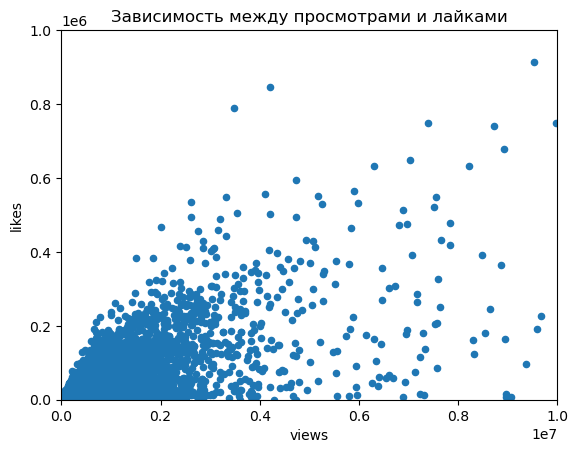

In [8]:
data.plot(kind='scatter', 
        x='views', 
        y='likes', 
        title='Зависимость между просмотрами и лайками'
       )
plt.xlim(0, 10000000)
plt.ylim(0, 1000000)
#Наблюдаем корреляцию зависимость между лайками и просмотрами: чем выше просмотров у видео, тем больше у видео будет лайков

In [9]:
dinamics_by_month = data[(data['month_trending_date'] != 11) & (data['month_trending_date'] != 6)][['channel_title', 'month_trending_date', 'year_trending_date']].groupby(['year_trending_date', 'month_trending_date']).count()
dinamics_by_month
#Исключим ноябрь и июнь месяца, т.к данные представлены только за полмесяца

channel_title
year_trending_date month_trending_date               
2017               12                            6199
2018               1                             5794
                   2                             5576
                   3                             6176
                   4                             4794
                   5                             6067

<Axes: title={'center': 'Динамика попадания видео в тренды'}, xlabel='Год и месяц', ylabel='Количество видео'>

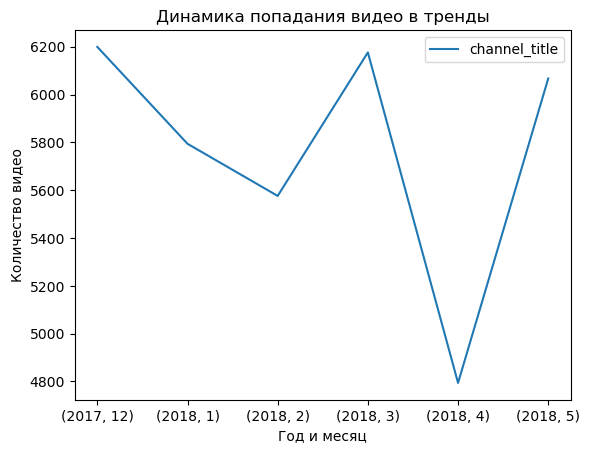

In [10]:
dinamics_by_month.plot(title='Динамика попадания видео в тренды',
                             xlabel='Год и месяц',
                             ylabel='Количество видео')
#Резкая просадка количества трендовых видео, возможно, связана с тем, что были президенсткие выборы в марте, многие блогеры пилили политический контент за деньги, 
# не каждой аудитории такое понравилось и они отвернулись от блогера. Резкий скачок в мае опять же может быть связан с политикой, но уже с протестами после резонансного расследования от команды Навального и видео с протестов